# Introduction

In this project, we are interested in developing a deep learning model that can classify patients likely to have diabetes. For the project, we used the following data.

> Center for Disease Control (2016). 2015 Survey Data and Documentation [Dataset]. Behavioral Risk Factor Survey System. [https://www.cdc.gov/brfss/annual_data/2015/files/LLCP2015XPT.zip](https://www.cdc.gov/brfss/annual_data/2015/files/LLCP2015XPT.zip).

In the following cells, we import all the libraries, classes, and functions we need for the project as well as the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

2025-04-27 07:48:19.963431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745740100.004523   36632 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745740100.014274   36632 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
input_file = "2015.csv"
full_df = pd.read_csv(input_file)
full_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,11.0,b'12162015',b'12',b'16',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,11.0,b'12142015',b'12',b'14',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,11.0,b'12232015',b'12',b'23',b'2015',1200.0,2.015005e+09,2.015005e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,9.0,9.0,NaN
441454,72.0,11.0,b'12152015',b'12',b'15',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


There are 441456 rows of data, each representing an individual survey respondent. There are 330 columns of data, and one of the columns `DIABETE3` is the target column for our classification task. In the other 329 columns, a lot of the information is irrelevant to the classification task (e.g., survey date, survey ID number, phone numbers) and some of the information is redundant (e.g., the number of vegetables eaten per week as well as the numbers of green, orange, and other vegetables). For this project, we will keep the target column `DIABETE3` as well as 21 additional columns recording information about high blood sugar, cholesterol, BMI, smoking, stroke, heart disease, exercise, fruit and vegetable consumption, alcohol consumption, health insurance, overall physical and mental health, sex, age, education, and income. The following cell extracts these columns into a data frame `df` on which we will conduct and exploratory data analysis and perform preprocessing.

In [3]:
cols_to_keep = [
    "DIABETE3", "_RFHYPE5", "TOLDHI2", "_CHOLCHK", "_BMI5", "_RFSMOK3", 
    "CVDSTRK3",  "_MICHD", "EXERANY2", "_FRUTSUM", "_VEGESUM", "_RFDRHV5", 
    "HLTHPLN1", "MEDCOST", "GENHLTH", "MENTHLTH", "PHYSHLTH", "DIFFWALK", 
    "SEX", "_AGEG5YR", "EDUCA", "INCOME2"
]
df = full_df[cols_to_keep]

# Data Exploration

Our reduced data frame records 22 columns' worth of data for 441456 patients. Below is a brief description of the information in each column. More details can be found in the [documentation](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf) accompanying the survey data.

* `DIABETE3`, whether the respondent is diabetic, prediabetic, or diabetic while pregnant (4-level target)
* `_FRHYPE5`, whether the respondent has high blood pressure
* `TOLDHI2`, whether the respondent has high cholesterol
* `_CHOLCHK`, whether the responent's cholesterol has been checked
* `_BMI5`, the respondent's BMI
* `_RFSMOK3`, whether the respondent is a smoker
* `CVDSTRK3`, whether the respondent has had a stroke
* `_MICHD`, whether the respondent has heart disease
* `EXERANY2`, whether the respondent exercises regularly
* `_FRUTSUM`, the average number of fruits the respondent eats each day
* `_VEGESUM`, the average number of vegetables the respondent eats each day
* `_RFDRHV5`, whether the respondent is a heavy drinker
* `HLTHPLN1`, whether the respondent has health insurance
* `MEDCOST`, whether the respondent has been unable to afford healthcare previously
* `GENHLTH`, the self-reported general health of the respondent (5-level factor)
* `MENTHLTH`, the number of days in the past month the respondent has had poor mental health
* `PHYSHLTH`, the number of days in the past month the respondent has had poor physical health
* `DIFFWALK`, whether the respondent has difficulty walking
* `SEX`, the respondent's sex
* `_AGEG5YR`, the respondent's age bracket (e.g., 25 - 29, 30 - 34, etc.)
* `EDUCA`, the respondent's education level (6-level factor)
* `INCOME2`, the respondent's income bracket (8-level factor)

In [4]:
df.isna().sum()

DIABETE3        7
_RFHYPE5        0
TOLDHI2     59154
_CHOLCHK        0
_BMI5       36398
_RFSMOK3        0
CVDSTRK3        0
_MICHD       3942
EXERANY2    35444
_FRUTSUM    43711
_VEGESUM    51117
_RFDRHV5        0
HLTHPLN1        0
MEDCOST         1
GENHLTH         2
MENTHLTH        0
PHYSHLTH        1
DIFFWALK    12334
SEX             0
_AGEG5YR        0
EDUCA           0
INCOME2      3301
dtype: int64

As shown above, our data includes numerous missing values. Some of these appear as `NA` in the data frame, but others are represented as numeric codes that can be found in the documentation accompanying the data. The following cells drop rows in `df` that contain `NA` values or numeric values corresponding that missing responses to survey items.

In [5]:
na_codes = {
    "DIABETE3": [7, 9],
    "_RFHYPE5": [9],
    "TOLDHI2": [7, 9],
    "_CHOLCHK": [9],
    "_RFSMOK3": [9],
    "CVDSTRK3": [7, 9],
    "EXERANY2": [7, 9],
    "_RFDRHV5": [9],
    "HLTHPLN1": [7, 9],
    "MEDCOST": [7, 9],
    "GENHLTH": [7, 9],
    "MENTHLTH": [77, 99],
    "PHYSHLTH": [77, 99],
    "DIFFWALK": [7, 9],
    "_AGEG5YR": [14],
    "EDUCA": [9],
    "INCOME2": [77, 99]
}

In [6]:
df = df.dropna()
for c in na_codes.keys():
    na_ids = df[df[c].isin(na_codes[c])].index
    df = df.drop(na_ids, axis = 0)
df.shape

(253588, 22)

After removing missing values, we still have 253588 survey respondents represented in our data, and we believe that should be enough to construct a viable classification model. Before proceeding with exploratory analysis, we will assign more human-readable names to the columns.

In [7]:
df.columns

Index(['DIABETE3', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', '_RFSMOK3',
       'CVDSTRK3', '_MICHD', 'EXERANY2', '_FRUTSUM', '_VEGESUM', '_RFDRHV5',
       'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
       'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2'],
      dtype='object')

In [8]:
df.columns = [
    "diabetic", "high_bp", "high_chol", "chol_check", "bmi", "smoker",
    "had_stroke", "heart_disease", "exercise", "num_fruits", "num_vegs",
    "heavy_drinker", "has_insurance", "cost_barrier", "gen_health",
    "mental_health", "phys_health", "difficulty_walking", "sex", "age",
    "education", "income"
]

Next, we check for any nonnumeric columns. We then sort the numeric columns into lists of binary and nonbinary variable names, and we examine the values recorded in the binary columns.

In [9]:
object_cols = [c for c in df.columns if df.dtypes[c] == "object"]
print(f"number of nonnumeric columns: {len(object_cols)}")

number of nonnumeric columns: 0


In [10]:
binary_cols = [
    c for c in df.columns if len(df[c].value_counts().index) == 2
]
nonbinary_cols = [
    c for c in df.columns if c not in binary_cols
]
for c in binary_cols:
    print(f"column = {c}, values = {df[c].value_counts().index}")

column = high_bp, values = Index([1.0, 2.0], dtype='float64', name='high_bp')
column = high_chol, values = Index([2.0, 1.0], dtype='float64', name='high_chol')
column = chol_check, values = Index([1.0, 2.0], dtype='float64', name='chol_check')
column = smoker, values = Index([1.0, 2.0], dtype='float64', name='smoker')
column = had_stroke, values = Index([2.0, 1.0], dtype='float64', name='had_stroke')
column = heart_disease, values = Index([2.0, 1.0], dtype='float64', name='heart_disease')
column = exercise, values = Index([1.0, 2.0], dtype='float64', name='exercise')
column = heavy_drinker, values = Index([1.0, 2.0], dtype='float64', name='heavy_drinker')
column = has_insurance, values = Index([1.0, 2.0], dtype='float64', name='has_insurance')
column = cost_barrier, values = Index([2.0, 1.0], dtype='float64', name='cost_barrier')
column = difficulty_walking, values = Index([2.0, 1.0], dtype='float64', name='difficulty_walking')
column = sex, values = Index([2.0, 1.0], dtype='float64', 

There are no nonnumeric columns, and each of binary columns records only the values 1 and 2, which represent responses of "no" and "yes" according to the survey documentation.

The target column `diabetic` (previously named `DIABET3`) turns out to be one of the nonbinary columns. Possible values recorded in this column are 1 (diabetic), 2 (diabetic but only while pregnant), 3 (not diabetic), and 4 (borderline diabetic). Below, we see the distrubtion of these classes in the data.

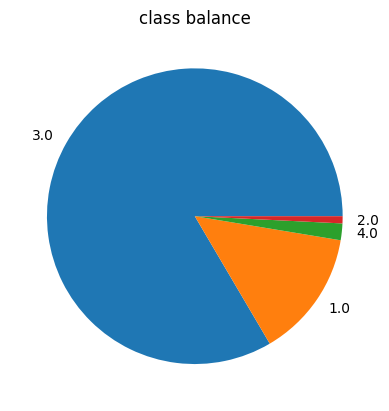

In [11]:
diabetic_counts = df["diabetic"].value_counts()
plt.pie(diabetic_counts, labels = diabetic_counts.index)
plt.title("class balance")
plt.show()

The following cell produces a heatmap from the correlation matrix of the nonbinary variables.

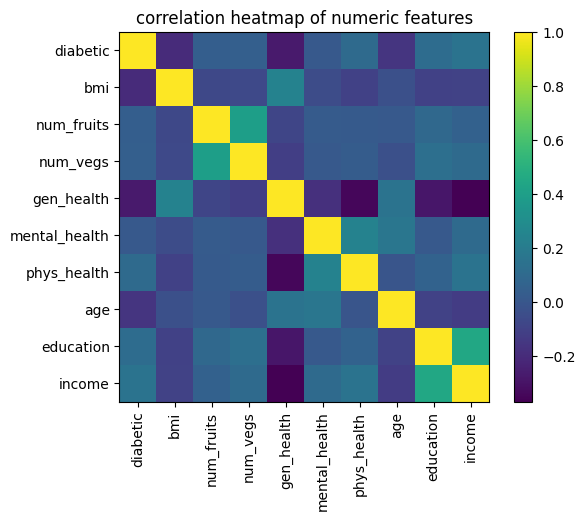

In [12]:
fig, ax = plt.subplots()
im = plt.imshow(df[nonbinary_cols].corr())
plt.colorbar()
ax.set_xticks(
    range(len(nonbinary_cols)),
    labels = nonbinary_cols,
    rotation = 90
)
ax.set_yticks(
    range(len(nonbinary_cols)),
    labels = nonbinary_cols
)
ax.set_title("correlation heatmap of numeric features")
plt.show()

The strongest correlations among the nonbiary features are between fruit and vegetable consumption and between education and income. These are unsurprising correlations, and they do not to be strong enough to interfere with training. The following cell produces histograms for the remaining nonbinary variables.

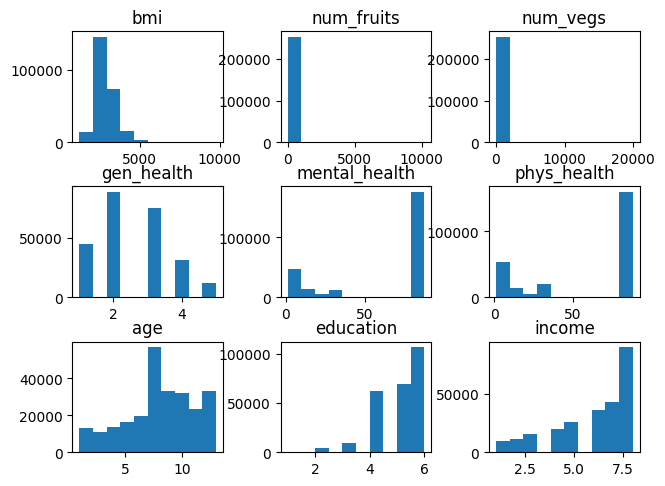

In [13]:
fig, ax = plt.subplots(3, 3)
fig.tight_layout()
i = 0
for c in nonbinary_cols[1:]:
    ax[i // 3][i % 3].hist(df[c])
    ax[i // 3][i % 3].set_title(c)
    i += 1
plt.show()

The histograms for `num_fruits` and `num_vegs` are extremely skew, and they seem to suggest that a small number of people are eating as many as 10000 fruits and 20000 vegetables per day. When we consult the documentation, we see that these are computed variables with two implied decimal places (i.e., an entry of 500 in `num_fruits` indicates a respondent who eats 5 fruits per day). Furthermore, less than 1% of the entries in `num_fruits` and `num_vegetables` are greater than 1000, and the remaining values in these columns appears to fall in a rather typical exponential or gamma distrbution.

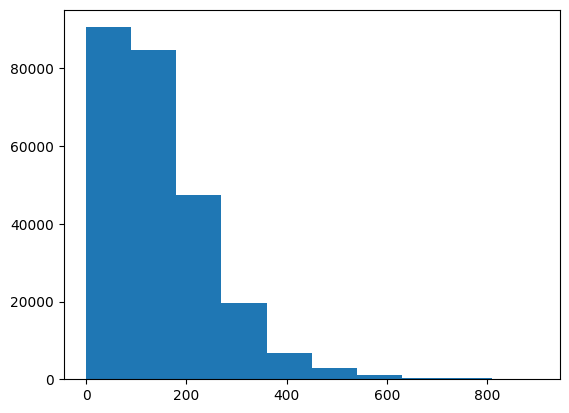

In [14]:
plt.hist(df[df["num_fruits"] < 1000]["num_fruits"])
plt.show()

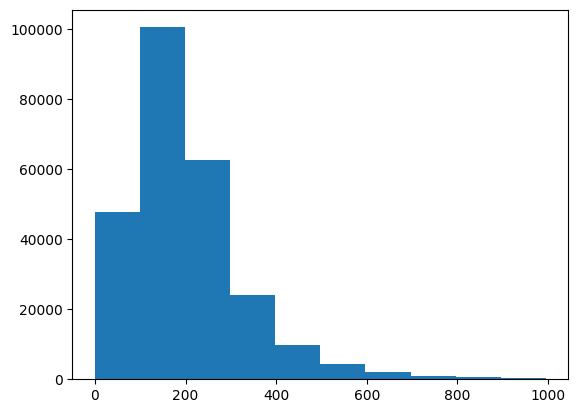

In [15]:
plt.hist(df[df["num_vegs"] < 1000]["num_vegs"])
plt.show()

Histograms for `mental_health` and `phys_health` have a suspicious cluster of values close to 100. These columns record the number of days out of the last 30 days during which respondents experienced poor mental or physical health. When we consult the survey documentation, we see that responses of "0" were recorded with the value 88.

# Plan of analysis and preprocessing

Based on the EDA presented here, we believe the following preprocessing steps are in order.

1. Remove outlier rows with `num_fruits` or `num_vegs` values greater than 1000.
2. Drop rows with values in the `diabetic` column corresponding to "yes while pregnant" and "borderline", thereby reducing the classification task to a binary one.
3. Apply a boolean encoding to binary columns, with `True` representing 2 and `False` representing 1.
4. Reencode age and income groups with more semantically meaningful integers. For instance, age group 2 represents respondents aged 25 to 29, and income group 2 represents respondents with annual income between 10000 and 15000. We will reencode these ranges with integers corresponding to their lower bounds.
5. Replace entries of 88 with 0s in the `mental_health` and `phys_health` columns.
6. Create a balanced data frame by extracting all rows in `df` beloning to the positive class and an equal number of randomly sampled rows chosen from the negative class.
7. Apply min-max scaling to the predictor variables.
8. Partition the balanced data into a train/test split.
9. Transform the training and testing sets into TensorFlow datasets.

After preprocessing, we will construct a baseline neural network and compare its performance to alternate architectures with different forms of regularization.

**Step 1.** Remove rows with outlier values in `num_fruits` and `num_vegs`.

In [16]:
df = df[df["num_fruits"] < 1000]
df = df[df["num_vegs"] < 1000]

**Step 2.** Reduce the classification task to binary.

In [17]:
df["diabetic"] = (df["diabetic"] == 1)

**Step 3.** Reencode all binary columns as booleans.

In [18]:
for c in binary_cols:
    df[c] = (df[c] == 2)

**Step 4.** Apply semantically meaningful encoding to age and income groups.

In [19]:
agegrp_to_age = {
    1: 18,
    2: 25,
    3: 30,
    4: 35,
    5: 40,
    6: 45,
    7: 50,
    8: 55,
    9: 60,
    10: 65,
    11: 70,
    12: 75,
    13: 80
}
df["age"] = df["age"].apply(lambda x: agegrp_to_age[x])
df["age"]

0         60
1         50
3         60
5         70
6         70
          ..
441450    40
441451    70
441452    25
441454    50
441455    60
Name: age, Length: 252872, dtype: int64

In [20]:
inccat_to_income = {
    1: 0,
    2: 10000,
    3: 15000,
    4: 20000,
    5: 25000,
    6: 35000,
    7: 50000,
    8: 75000
}
df["income"] = df["income"].apply(lambda x: inccat_to_income[x])
df["income"]

0         15000
1             0
3         75000
5         35000
6         20000
          ...  
441450    50000
441451    20000
441452    10000
441454        0
441455    10000
Name: income, Length: 252872, dtype: int64

**Step 5.** Replace 88s with 0s in `mental_health` and `phys_health`.

In [21]:
df["mental_health"] = df["mental_health"].replace(88, 0)
df["phys_health"] = df["phys_health"].replace(88, 0)

**Step 6.** Create a balanced data frame.

In [22]:
pos_df = df[df["diabetic"]]
n = pos_df.shape[0]
neg_df = df[-df["diabetic"]].sample(n, random_state = 419)
bal_df = pd.concat([pos_df, neg_df])
bal_df["diabetic"].mean()

0.5

**Step 7.** Apply min-max scaling.

In [23]:
scaler = MinMaxScaler()
y = bal_df["diabetic"]
X = bal_df.drop("diabetic", axis = 1)
X = scaler.fit_transform(X)

**Step 8.** Partition data into a train/test split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 419
)

**Step 9.** Create TensorFlow data sets.

In [25]:
def create_ds(X, y):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    ds = ds.shuffle(buffer_size=len(X))
    return ds
keras.utils.set_random_seed(419)
ds_train = create_ds(X_train, y_train)
ds_test = create_ds(X_test, y_test)
ds_train = ds_train.batch(32)
ds_test = ds_test.batch(32)

2025-04-27 07:48:45.925249: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Baseline model
In the following cells, we define a baseline model consisting of a dense neural network with three hidden layers and ReLU activation followed by an output layer with sigmoid activation. We train the model with the Adam optimizer and binary crossentropy as the loss function. Since we are training on a balanced data set, accuracy is a reasonable secondary metric to track during training. We employ early stopping with weight restoration after five consecutive epochs with less than 0.001 improvement in validation loss.

In [26]:
base_model = Sequential([
    layers.Input(shape = (21,)),
    layers.Dense(128, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "sigmoid"),
])
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
base_model.compile("adam", "binary_crossentropy", metrics = ["acc"])
es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)
base_history = base_model.fit(
    ds_train, 
    epochs = 100, 
    validation_data = ds_test,
    callbacks = [es]
)

Epoch 1/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.7379 - loss: 0.5325 - val_acc: 0.7599 - val_loss: 0.5026
Epoch 2/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7555 - loss: 0.5051 - val_acc: 0.7616 - val_loss: 0.5045
Epoch 3/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.7637 - loss: 0.4976 - val_acc: 0.7628 - val_loss: 0.4971
Epoch 4/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7634 - loss: 0.4999 - val_acc: 0.7655 - val_loss: 0.4951
Epoch 5/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7655 - loss: 0.4927 - val_acc: 0.7664 - val_loss: 0.4964
Epoch 6/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.7634 - loss: 0.4962 - val_acc: 0.7630 - val_loss: 0.4979
Epoch 7/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.7612 - loss: 0.4961 - val_acc: 0.7682 - val_loss: 0.4971
Epoch 8/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7606 - loss: 0.4953 - val_acc: 0.7623 - val_loss: 0.5034
Epoch 9/100
1763/1763 ━━━━━━━━━━

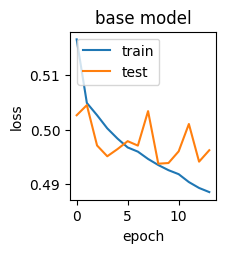

In [28]:
plt.subplot(2,3,1)
plt.plot(base_history.history["loss"])
plt.plot(base_history.history["val_loss"])
plt.title("base model")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

Plotting loss values over epochs for the baseline model suggests that overfitting happens almost immediately. This is likely because there is no regularization present in the model. In the next section, we consider architectures that incorporate regularization in order to reduce overfitting.

# Additional architectures

We now consider two regularization strategies.

1. **L2 regularization.** In L2 reguarization, a pentalty is assigned to each weight vector according to its L2 norm and a regularization factor. As the regularization factor increases, the model favors weight vectors closer to the origin in parameter space. In general, weights that overfit to the training data do not tend to lie particularly close to the origin, so setting the regularization factor at a reasonable level helps control overfitting.
2. **Dropout layers.** If two dense hidden layers have a dropout layer between them, then a random fraction of the weights connecting the two dense layers are set to zero with each batch of training data. The result is that the model is trained somewhat like a large ensemble of reduced models. Any one of the reduced models might overfit to one batch or another, but the entire model as a whole will be more robust against overfitting.

In the following cells, we train a model with L2 regularization applied directly to each hidden layer, another model with dropout layers inserted between each hidden layer, and
a third model combining the L2 regularization and dropout layers. We train the models with the same optimizer, loss function, performance metrics, and early stopping used with the baseline model.

In [29]:
l2_model = Sequential([
    layers.Input(shape = (21,)),
    layers.Dense(
        128, 
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.l2()
    ),
    layers.Dense(
        64, 
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.l2()
    ),
    layers.Dense(
        32, 
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.l2()
    ),
    layers.Dense(1, activation = "sigmoid"),
])
l2_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
l2_model.compile("adam", "binary_crossentropy", metrics = ["acc"])
es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)
l2_history = l2_model.fit(
    ds_train, 
    epochs = 100, 
    validation_data = ds_test,
    callbacks = [es],
    verbose = 0
)

In [31]:
dropout_model = Sequential([
    layers.Input(shape = (21,)),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.1),
    layers.Dense(64, activation = "relu"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "relu"),
    layers.Dropout(0.1),
    layers.Dense(1, activation = "sigmoid"),
])
dropout_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
dropout_model.compile("adam", "binary_crossentropy", metrics = ["acc"])
es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)
dropout_history = dropout_model.fit(
    ds_train, 
    epochs = 100, 
    validation_data = ds_test,
    callbacks = [es],
    verbose = 0
)

In [33]:
l2_dropout_model = Sequential([
    layers.Input(shape = (21,)),
    layers.Dense(
        128, 
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.l2()
    ),
    layers.Dropout(0.01),
    layers.Dense(
        64, 
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.l2()
    ),
    layers.Dropout(0.01),
    layers.Dense(
        32, 
        activation = "relu",
        kernel_regularizer = tf.keras.regularizers.l2()
    ),
    layers.Dropout(0.01),
    layers.Dense(1, activation = "sigmoid"),
])
l2_dropout_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
l2_dropout_model.compile("adam", "binary_crossentropy", metrics = ["acc"])
es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)
l2_dropout_history = l2_dropout_model.fit(
    ds_train, 
    epochs = 100, 
    validation_data = ds_test,
    callbacks = [es],
    verbose = 0
)

With all three models trained, we can now compare their loss evolutions to determine how well the different regularization strategies perform.

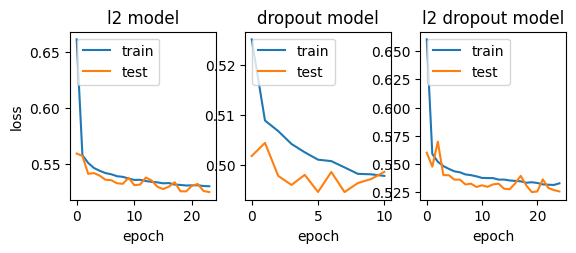

In [35]:
plt.subplot(2, 3, 1)
plt.plot(l2_history.history["loss"])
plt.plot(l2_history.history["val_loss"])
plt.title("l2 model")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc = "upper left")

plt.subplot(2, 3, 2)
plt.plot(dropout_history.history["loss"])
plt.plot(dropout_history.history["val_loss"])
plt.title("dropout model")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")

plt.subplot(2,3,3)
plt.plot(l2_dropout_history.history["loss"])
plt.plot(l2_dropout_history.history["val_loss"])
plt.title("l2 dropout model")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")

plt.show()

Based on the loss plots, the model employing L2 regularization only appears to control overfitting most successfully. Besides looking at how well the models avoid overfitting, we need to consider how well they identify individuals with diabetes. The models' F1 scores are a good basis for comparing the models because the F1 scores give a balanced sense of how well the models avoid type i and type ii errors. In the following cell, we also compare F1 scores among the baseline model and the three regularized models implemented so far.

In [36]:
base_pred = (base_model.predict(ds_test) > 0.5)*1
l2_pred = (l2_model.predict(ds_test) > 0.5)*1
dropout_pred = (dropout_model.predict(ds_test) > 0.5)*1
l2_dropout_pred = (l2_dropout_model.predict(ds_test) > 0.5)*1
print("f1 scores\n=========")
print(f"base model: {f1_score(y_test, base_pred)}")
print(f"l2 model: {f1_score(y_test, l2_pred)}")
print(f"dropout model: {f1_score(y_test, dropout_pred)}")
print(f"l2 dropout model: {f1_score(y_test, l2_dropout_pred)}")

441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
f1 scores
base model: 0.6144613076346008
l2 model: 0.6082600337857518
dropout model: 0.6070802663862601
l2 dropout model: 0.617239993108597


The two models employing L2 regularization seemed most resistant to overfitting, but the dropout model achieved a higher F1 score. In the next section, we tune hyperparameters for an L2 model and a dropout model to see if any additional performance improvement is possible.

# Hyperparameter tuning

The hyperparameters with the strongest effect on L2 regularization and dropout layer performance are, respectively, the regularization parameter and the dropout rate. For both regularization strategies, the learning rate of the optimizer is also an important hyperparameter because it controls how quickly the model adapts to the training data. For this project we will tune the L2 regularization factor, the dropout rate, and the learning rate. 

The following cells define functions for generating models with variable L2 regularization factors `l2`, dropout rates `dr`, and learing rates `lr`.

In [37]:
def get_l2_model(lr, l2):
    mod = Sequential([
        layers.Input(shape = (21,)),
        layers.Dense(
            128, 
            activation = "relu",
            kernel_regularizer = tf.keras.regularizers.l2(l2 = l2)
        ),
        layers.Dense(
            64, 
            activation = "relu",
            kernel_regularizer = tf.keras.regularizers.l2(l2 = l2)
        ),
        layers.Dense(
            32, 
            activation = "relu",
            kernel_regularizer = tf.keras.regularizers.l2(l2 = l2)
        ),
        layers.Dense(1, activation = "sigmoid")
    ])
    opt = Adam(lr)
    mod.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["acc"])
    return mod        

In [38]:
def get_dropout_model(lr, dr):
    mod = Sequential([
        layers.Input(shape = (21,)),
        layers.Dense(128, activation = "relu"),
        layers.Dropout(dr),
        layers.Dense(64, activation = "relu"),
        layers.Dropout(dr),
        layers.Dense(32, activation = "relu"),
        layers.Dropout(dr),
        layers.Dense(1, activation = "sigmoid")
    ])
    opt = Adam(lr)
    mod.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["acc"])
    return mod        

Now we conduct hyperparameter tuning. For `lr` values between 0.00001 and 0.01 and `l2` values between 0.0001 and 0.1, we create a model with L2 regularization and train the model with the same parameters used to train the previous four models. Each trained model and its history are stored in dictionaries `l2_models` and `l2_histories`, and the F1 score of the trained model is stored in a data frame `l2_f1_scores`.

In [39]:
lr_values = [0.00001, 0.0001, 0.001, 0.01]
l2_values = [0.0001, 0.001, 0.01, 0.1]
l2_models = {}
l2_histories = {}
l2_f1_scores = pd.DataFrame(np.zeros((4,4)))
l2_f1_scores.index = lr_values
l2_f1_scores.columns = l2_values
for lr in lr_values:
    for l2 in l2_values:
        print(f"learning rate = {lr}, l2 factor = {l2}")
        mod = get_l2_model(lr, l2)
        es = EarlyStopping(
            monitor = "val_loss",
            min_delta = 0.001,
            patience = 5,
            restore_best_weights = True
        )
        l2_histories[(lr, l2)] = mod.fit(
            ds_train, 
            epochs = 100, 
            validation_data = ds_test,
            callbacks = [es],
            verbose = 0
        )
        l2_models[(lr, l2)] = mod
        pred = (mod.predict(ds_test) > 0.5)*1
        l2_f1_scores.loc[lr, l2] = f1_score(y_test, pred)

learning rate = 1e-05, l2 factor = 0.0001
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
learning rate = 1e-05, l2 factor = 0.001
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
learning rate = 1e-05, l2 factor = 0.01
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
learning rate = 1e-05, l2 factor = 0.1
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
learning rate = 0.0001, l2 factor = 0.0001
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
learning rate = 0.0001, l2 factor = 0.001
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
learning rate = 0.0001, l2 factor = 0.01
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
learning rate = 0.0001, l2 factor = 0.1
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
learning rate = 0.001, l2 factor = 0.0001
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
learning rate = 0.001, l2 factor = 0.001
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
learning rate = 0.001, l2 factor = 0.01
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
learning rate = 0.001, l2 factor = 0.1
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/ste

Next, for `lr` values between 0.00001 and 0.01 and `dr` values between 0.005 and 0.4, we create models with dropout layers and train the models with the same parameters as before.  We will attempt to identify the best classifier based on F1 scores, but we also need to examine models' training histories to see whether the models appear to be learning effectively. Trained models, their histories, and their F1 scores are stored `dropout_models`, `dropout_histories`, and `dropout_f1_scores`.

In [40]:
dr_values = [0.05, 0.1, 0.2, 0.4]
dropout_models = {}
dropout_histories = {}
dropout_f1_scores = pd.DataFrame(np.zeros((4,4)))
dropout_f1_scores.index = lr_values
dropout_f1_scores.columns = dr_values
for lr in lr_values:
    for dr in dr_values:
        print(f"learning rate = {lr}, dropout rate = {dr}")
        mod = get_dropout_model(lr, dr)
        es = EarlyStopping(
            monitor = "val_loss",
            min_delta = 0.001,
            patience = 5,
            restore_best_weights = True
        )
        dropout_histories[(lr, dr)] = mod.fit(
            ds_train, 
            epochs = 100, 
            validation_data = ds_test,
            callbacks = [es],
            verbose = 0
        )
        dropout_models[(lr, dr)] = mod
        pred = (mod.predict(ds_test) > 0.5)*1
        dropout_f1_scores.loc[lr, dr] = f1_score(y_test, pred)

learning rate = 1e-05, dropout rate = 0.05
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
learning rate = 1e-05, dropout rate = 0.1
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
learning rate = 1e-05, dropout rate = 0.2
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
learning rate = 1e-05, dropout rate = 0.4
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
learning rate = 0.0001, dropout rate = 0.05
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
learning rate = 0.0001, dropout rate = 0.1
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
learning rate = 0.0001, dropout rate = 0.2
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
learning rate = 0.0001, dropout rate = 0.4
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
learning rate = 0.001, dropout rate = 0.05
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
learning rate = 0.001, dropout rate = 0.1
441/441 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
learning rate = 0.001, dropout rate = 0.2
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
learning rate = 0.001, dropout rate = 0.4
441/441 ━━━━━━━━━━

# Results

The hyperparameter tuning results are shown in the heatmaps below. We are interested in the hyperparameter values that maximize F1 scores.

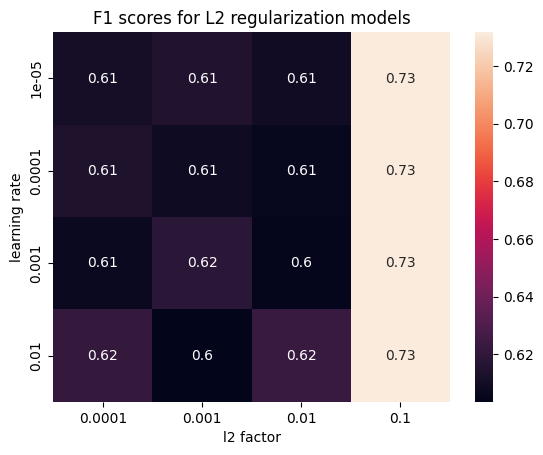

In [41]:
sns.heatmap(l2_f1_scores, annot = True)
plt.title("F1 scores for L2 regularization models")
plt.xlabel("l2 factor")
plt.ylabel("learning rate")
plt.show()

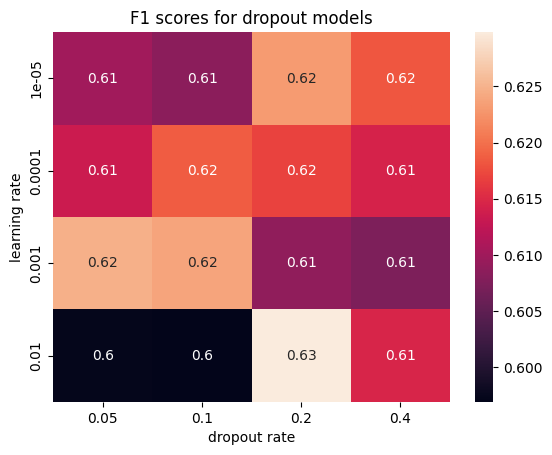

In [42]:
sns.heatmap(dropout_f1_scores, annot = True)
plt.title("F1 scores for dropout models")
plt.xlabel("dropout rate")
plt.ylabel("learning rate")
plt.show()

Among the hyperparameter values tested, the model employing L2 regularization performed best when `lr` and `ld` were set to their maximum values of 0.01 and 0.1. However, when we conduct an additional training cycle and compute the model's confusion matrix, we see that these settings actually lead the model to classify every respondent represented in the data set as diabetic.

Epoch 1/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.5689 - loss: 1.0441 - val_acc: 0.5770 - val_loss: 0.6813
Epoch 2/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.5664 - loss: 0.6846 - val_acc: 0.5770 - val_loss: 0.6817
Epoch 3/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5679 - loss: 0.6842 - val_acc: 0.5770 - val_loss: 0.6814
Epoch 4/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5701 - loss: 0.6834 - val_acc: 0.5770 - val_loss: 0.6820
Epoch 5/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.5683 - loss: 0.6840 - val_acc: 0.5770 - val_loss: 0.6813
Epoch 6/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.5709 - loss: 0.6833 - val_acc: 0.5770 - val_loss: 0.6813
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step

best l2 model f1 = 0.7317687258340078


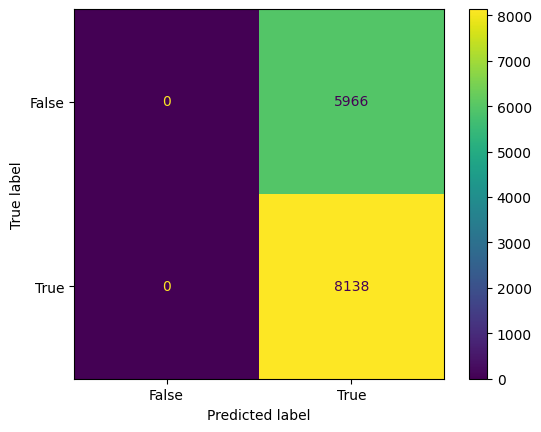

In [49]:
best_l2_mod = get_l2_model(0.01, 0.1)
es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)
best_l2_hist = best_l2_mod.fit(
    ds_train, 
    epochs = 100, 
    validation_data = ds_test,
    callbacks = [es]
)
pred = (best_l2_mod.predict(ds_test) > 0.5)*1
ConfusionMatrixDisplay.from_predictions(y_test, pred)
print(f"\nbest l2 model f1 = {f1_score(y_test, pred)}")

The following two cells produce plots of the best L2 regularization model's loss and accuracy over its training epochs. Both graphs reflect the fact that the model shows no improvement in its test performance over the first five epochs. Early stopping causes the model to revert to its initial weights, which happen to produce positive predictions for every row in the test set. In other words, when we tuned L2 regularization based on F1 scores, we succeeded in avoiding overfitting, but we were led to a model that underfit the data instead.

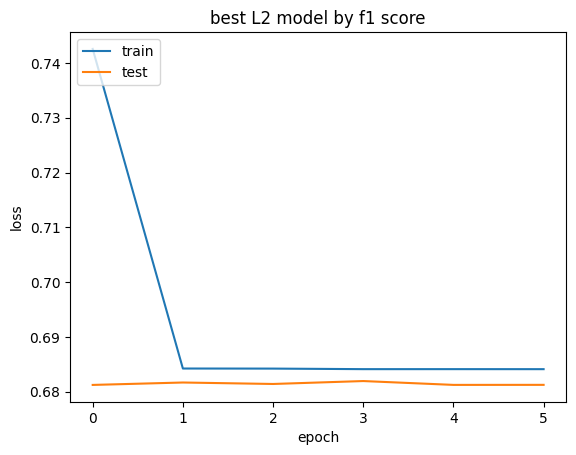

In [50]:
plt.plot(best_l2_hist.history["loss"])
plt.plot(best_l2_hist.history["val_loss"])
plt.title("best L2 model by f1 score")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

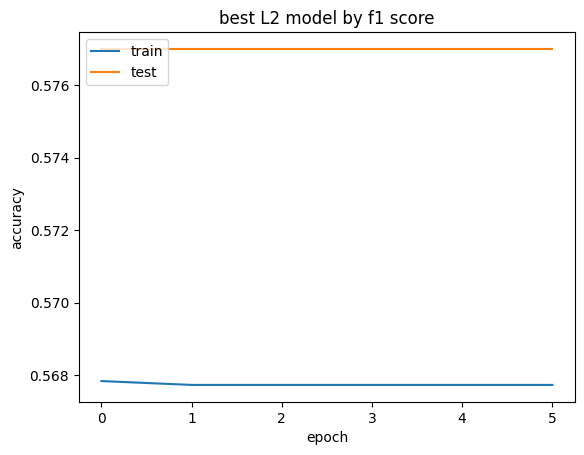

In [51]:
plt.plot(best_l2_hist.history["acc"])
plt.plot(best_l2_hist.history["val_acc"])
plt.title("best L2 model by f1 score")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

The model with dropout layers performed the best when `lr` and `dr` were set to 0.01 and 0.2. In this case, an additional round of training and prediction leads to a more reasonable confusion matrix.

Epoch 1/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.6764 - loss: 0.6088 - val_acc: 0.7519 - val_loss: 0.5203
Epoch 2/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7412 - loss: 0.5380 - val_acc: 0.7578 - val_loss: 0.5105
Epoch 3/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7488 - loss: 0.5267 - val_acc: 0.7589 - val_loss: 0.5087
Epoch 4/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7519 - loss: 0.5197 - val_acc: 0.7613 - val_loss: 0.5047
Epoch 5/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7516 - loss: 0.5184 - val_acc: 0.7627 - val_loss: 0.5029
Epoch 6/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7515 - loss: 0.5190 - val_acc: 0.7640 - val_loss: 0.5013
Epoch 7/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7570 - loss: 0.5118 - val_acc: 0.7643 - val_loss: 0.5000
Epoch 8/100
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7538 - loss: 0.5162 - val_acc: 0.7634 - val_loss: 0.5001
Epoch 9/100
1763/1763 ━━━━━━━━━━

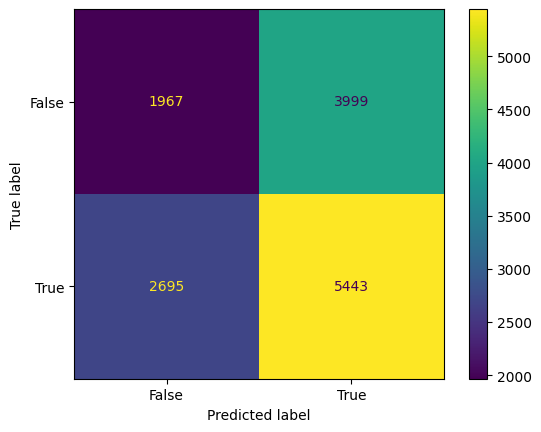

In [58]:
best_dropout_mod = get_dropout_model(0.01, 0.2)
es = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)
best_dropout_hist = best_dropout_mod.fit(
    ds_train, 
    epochs = 100, 
    validation_data = ds_test,
    callbacks = [es]
)
pred = (best_dropout_mod.predict(ds_test) > 0.5)*1
ConfusionMatrixDisplay.from_predictions(y_test, pred)
print(f"\nbest dropout model f1 = {f1_score(y_test, pred)}")

The last two cells produce plots of the best dropout model's loss and accuracy over its training epochs. These graphs indicate that the model's performance on test data steadily improves over the first several epochs before eventually leveling off, which is exactly the behavior we are hoping to see by employing regularization.

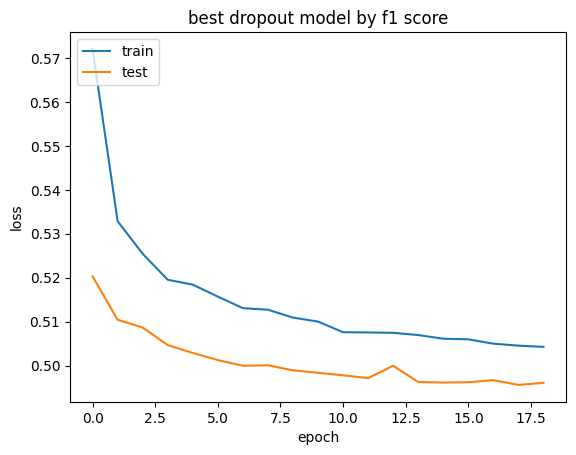

In [59]:
plt.plot(best_dropout_hist.history["loss"])
plt.plot(best_dropout_hist.history["val_loss"])
plt.title("best dropout model by f1 score")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

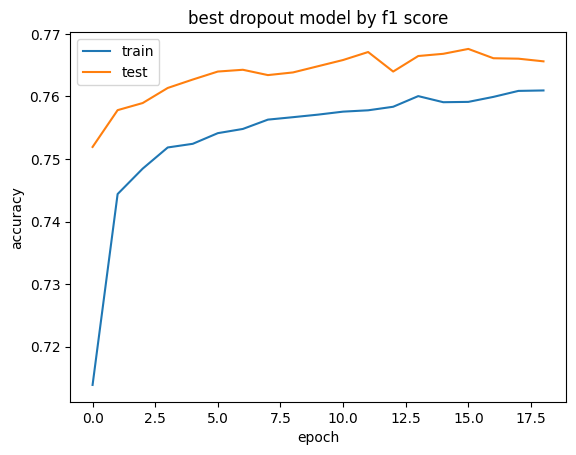

In [60]:
plt.plot(best_dropout_hist.history["acc"])
plt.plot(best_dropout_hist.history["val_acc"])
plt.title("best dropout model by f1 score")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

Among the two models to undergo hyperparameter tuning, the dropout model appears to be the better performing model because it avoids overfitting without reverting to underfitting.

# Conclusion

Our goal in this project was to develop a classifier that could identify individuals with diabetes based on information about their blood sugar, cholesterol, BMI, smoking, stroke, heart disease, exercise, fruit and vegetable consumption, alcohol consumption, health insurance, overall physical and mental health, sex, age, education, and income. We were successful in developing such a model, which demonstrated the ability to classify individuals with an accuracy rate approaching 75% but an F1 score only a little more than 0.50. To be sure, there is plenty of room for improvement, but this is a promising start.

Along the way, we experimented with L2 regularization and dropout layers in an attempt to make our model more robust against overfitting. Based on three untuned models, L2 regularization seemed to be more effective at preventing overfitting compared to dropout layers or a combination of dropout layers and L2 regularization. Unfortunately, hyperparameter tuning with L2 regularization led to a model that severely underfit the training data by predicting that every individual represented in the test set was diabetic. 

Underfitting is an understandable result. With our test set, the binary crossentropy associated with classifying everyone as diabetic happens to be lower than the binary crossentropy the model was able to achieve within 5 epochs with a high L2 regularization factor, so early stopping led to a "dumb" model. Furthermore, the F1 score for the "dumb" model happened to be higher than any other model we saw during hyperparamter tuning.

Happily, we also conducted hyperparameter tuning with dropout layers, and this architecture led to a model with better overall performance. Even though the untuned dropout model seemed more prone to overfitting, the tuning procedure led to a model that exhibited steady decrease in validation loss and steady decrease in validation accuracy, both signs of reliable learning. This might be an indication that the incorporation of dropout layers is a good regularization strategy for a classifier when the test set is somewhat imbalanced.

We conclude this project with a couple key takeaways.

1. **Evaluating competing regularization strategies.** L2 regularization and dropout layers both aim to control a model's susceptibility to overfitting, but they work in different ways. In this project, dropout layers proved to be the better technique because they did not cause the model suddenly to begin underfitting during hyperparameter tuning. Other regularization techniques include L1 regularization and data augmentation; in future research on this topic, we would wish to test each of these alone and in combination with L2 regularization and dropout layers to find the best strategy.
2. **Considering quantitative and qualitative performance.** If we based our final model selection in this project on F1 scores alone, we would have chosen the model that classifies every individual as diabetic. However, we looked qualitatively at the confusion matrix to discover that the model that seemed to perform the best was actually not useful, and we looked qualitatively at the loss and accuracy plots from the model's training regime to understand why.

In future iterations of this project, we would be interested in exploring other variables included in the data set. For instance, diabetes prevelance is known to vary by race. Race is among the features recorded in our initial data set, so we might consider building models that classify individuals in different racial categories. Other health indicators like height, weight, and history with asthma are included, and these could be incorporated into the model. Finally, certain columns in the data that we considered (e.g., vegetable consumption) can be made more granular (e.g., green vegetable consumption, orange vegetable consumption, etc.). In principle, deep learning models should be able to discover patterns involving the more detailed information available in the full data set.

Besides including additional data in our model, we would also be interested in investigating larger models. All of the models in we tested in this project had three dense layers with between 32 and 128 nodes. Using dropout layers and tuning the dropout rate, we were able to find a regularization strategy that helped our model avoid overfitting, but we would like to an F1 score higher than the 0.6 that we observed. For that, we might need additional dense layers or more nodes in each dense layer. Such a model would be more sensitive to patterns in the data and possibly more prone to overfitting. Based on the results of this project, we believe the inclusion of dropout layers is the most robust way to increase the size of the model without overfitting, though L2 regularization should also be tested and possibly other regularization strategies like L1 regularization and data augmentation.